In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import glob
import sys

sys.path.append("../")
from utils_new import gen_bursts, run_search, analyse_and_plot, fit_and_plot
from utils import *
from plotting import set_size

%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# make data
bursts_steep, name = gen_bursts(
    mu_params=[1650, 250],  # sigma_params=[450, 200],
    sigma_params=[300, 250],
    mu_dist="norm",
    sigma_dist="norm",
    N=50000,
    alpha=-1.8,
    E_min_log=37,
    E_max_log=42,
    save=False,
)

bursts_flat, name = gen_bursts(
    mu_params=[1650, 250],  # sigma_params=[450, 200],
    sigma_params=[300, 250],
    mu_dist="norm",
    sigma_dist="norm",
    N=50000,
    alpha=-1.2,
    E_min_log=37,
    E_max_log=42,
    save=False,
)

<IPython.core.display.Javascript object>

In [3]:
thresholds = [0.02, 0.02 * 5, 0.02 * 10 * 2]

<IPython.core.display.Javascript object>

# Energy CDF Slope

In [8]:
def fit_and_plot(
    E,
    ax,
    plot_orig=True,
    plot_fit=True,
    single_law=True,
    double_law=False,
    color="k",
    label="label",
):
    const = 10 ** 34
    Es = np.sort(E) / const
    Ns = np.linspace(len(Es) - 1, 0, len(Es))

    if plot_orig:
        ax.scatter(np.sort(E), np.log10(Ns), c=color, marker=".")

    if plot_fit:
        ret = {}
        if single_law:
            scale, slope = fit_single_power_law(Ns, Es)
            x = np.sort(E)
            y = np.log10(single_power_law(Es, scale, slope).astype("float"))
            ax.plot(x, y, c=color, label=f"{label}={slope:.3f}")

            ret["single"] = {"scale": scale, "slope": slope}

        if double_law:
            vals = fit_double_power_law(Ns, Es)
            scale, slope1, slope2, break_e = vals
            x = np.sort(E)
            y = np.log10(
                double_power_law(Es, scale, break_e, slope1, slope2).astype("float")
            )

            ax.axvline(x=break_e * const, linestyle="--", c=color)

            ax.plot(
                x,
                y,
                linestyle="--",
                c=color,
                label=f"{label}={slope1:.3f}, {slope2:.3f}",
            )
            # , break={break_e:.3f}')

            ax.set_xscale("log")
            ret["double"] = {
                "scale": scale,
                "slope1": slope1,
                "slope2": slope2,
                "break_e": break_e * const,
            }

        return ret
    else:
        return 0

<IPython.core.display.Javascript object>

0.02
44201 10510


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


0.1
44201 2394


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


0.4
44201 616


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


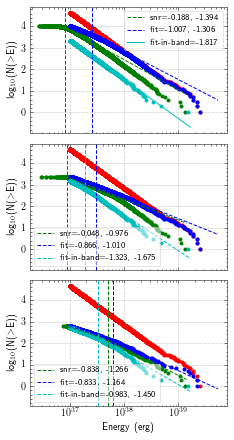

<IPython.core.display.Javascript object>

In [9]:
# Steep
with plt.style.context(["science", "grid"]):  # , "no-latex"]):
    fig, axes = plt.subplots(
        3,
        1,
        figsize=set_size(width="half", subplots=(3, 1)),
        sharey=True,
        sharex=True,
    )
    # fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
    for i, th in enumerate(thresholds):
        ax = axes[i]
        print(th)
        detected, detected_in_band_df, Es = run_search(
            bursts_steep,
            fstart=974,
            fend=1774,
            fluence_threshold=th,
            in_band_sig=3,
            ret="all",
            distance=972,
        )
        print(len(bursts_steep), len(detected))
        #     analyse_and_plot(bursts, detected, Es)
        original_E = Es["original_E"]
        detected_snr_E = Es["detected_snr_E"]
        detected_fit_E = Es["detected_fit_E"]
        detected_in_band_E = Es["detected_in_band_E"]

        #     plt.figure(figsize=(10, 6))

        fit_vals = {}
        fit_vals["orig"] = fit_and_plot(
            original_E,
            ax,
            plot_fit=False,
            plot_orig=True,
            single_law=False,
            double_law=False,
            color="r",
            #             label="Injected",
        )

        fit_vals["detected-snr"] = fit_and_plot(
            detected_snr_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=False,
            double_law=True,
            color="g",
            label="snr",
        )

        if i == 0:
            double_law = False
        else:
            double_law = True

        fit_vals["detected-fit"] = fit_and_plot(
            detected_fit_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=False,
            double_law=True,
            color="b",
            label="fit",
        )

        if i == 1 or i == 2:
            single_law = False
        else:
            single_law = True

        fit_vals["detected-in-band"] = fit_and_plot(
            detected_in_band_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=single_law,
            double_law=double_law,
            color="c",
            label="fit-in-band",
        )
        legend = ax.legend(fontsize="small")  # loc="lower left")
        legend.get_frame().set_alpha(0.5)
        if i == 2:
            ax.set_xlabel("Energy (erg)")
        ax.set_ylabel(r"log$_{10}$(N($>$E))")
    #         labels = [str(10 ** item._y) for item in ax.get_yticklabels()]
    #         ax.set_yticklabels(labels)
    #         ax.set_title(f"Fluence={th}Jyms")
    plt.tight_layout()
    #     plt.savefig("power_laws.pdf", bbox_inches="tight", dpi=300)
#     plt.savefig("power_laws.png", bbox_inches="tight", dpi=300)

0.02
44294 13843


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


0.1
44294 3921


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


0.4
44294 1141


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


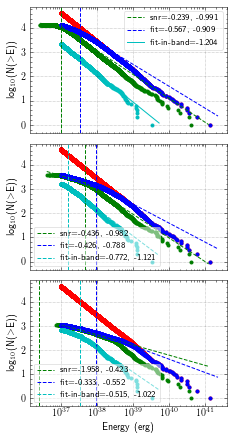

<IPython.core.display.Javascript object>

In [10]:
# Flat
with plt.style.context(["science", "grid"]):  # , "no-latex"]):
    fig, axes = plt.subplots(
        3,
        1,
        figsize=set_size(width="half", subplots=(3, 1)),
        sharey=True,
        sharex=True,
    )
    # fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
    for i, th in enumerate(thresholds):
        ax = axes[i]
        print(th)
        detected, detected_in_band_df, Es = run_search(
            bursts_flat,
            fstart=974,
            fend=1774,
            fluence_threshold=th,
            in_band_sig=3,
            ret="all",
            distance=972,
        )
        print(len(bursts_flat), len(detected))
        #     analyse_and_plot(bursts, detected, Es)
        original_E = Es["original_E"]
        detected_snr_E = Es["detected_snr_E"]
        detected_fit_E = Es["detected_fit_E"]
        detected_in_band_E = Es["detected_in_band_E"]

        #     plt.figure(figsize=(10, 6))

        fit_vals = {}
        fit_vals["orig"] = fit_and_plot(
            original_E,
            ax,
            plot_fit=False,
            plot_orig=True,
            single_law=False,
            double_law=False,
            color="r",
            #             label="Injected",
        )

        fit_vals["detected-snr"] = fit_and_plot(
            detected_snr_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=False,
            double_law=True,
            color="g",
            label="snr",
        )

        if i == 0:
            double_law = False
        else:
            double_law = True

        fit_vals["detected-fit"] = fit_and_plot(
            detected_fit_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=False,
            double_law=True,
            color="b",
            label="fit",
        )

        if i == 1 or i == 2:
            single_law = False
        else:
            single_law = True

        fit_vals["detected-in-band"] = fit_and_plot(
            detected_in_band_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=single_law,
            double_law=double_law,
            color="c",
            label="fit-in-band",
        )
        legend = ax.legend(fontsize="small")  # loc="lower left")
        legend.get_frame().set_alpha(0.5)
        if i == 2:
            ax.set_xlabel("Energy (erg)")
        ax.set_ylabel(r"log$_{10}$(N($>$E))")
    #         labels = [str(10 ** item._y) for item in ax.get_yticklabels()]
    #         ax.set_yticklabels(labels)
    #         ax.set_title(f"Fluence={th}Jyms")
    plt.tight_layout()
    #     plt.savefig("power_laws.pdf", bbox_inches="tight", dpi=300)
#     plt.savefig("power_laws.png", bbox_inches="tight", dpi=300)

# Energy PDF

In [4]:
def analyse_and_plot(bursts, detected, Es, ax, th):

    qs = np.quantile(bursts["in_mu_f"], [0.16, 0.5, 0.84])
    print(f"Injected mu_f is: {qs[1]:.3f}+{(qs[2] - qs[1]):.2f}-{(qs[1] - qs[0]):.2f}")

    qs = np.quantile(detected["in_mu_f"], [0.16, 0.5, 0.84])
    print(f"Recovered mu_f is: {qs[1]:.3f}+{(qs[2] - qs[1]):.2f}-{(qs[1] - qs[0]):.2f}")

    qs = np.quantile(bursts["in_sig_f"], [0.16, 0.5, 0.84])
    print(f"Injected sig_f is: {qs[1]:.2f}+{(qs[2] - qs[1]):.2f}-{(qs[1] - qs[0]):.2f}")

    qs = np.quantile(detected["in_sig_f"], [0.16, 0.5, 0.84])
    print(
        f"Recovered sig_f is: {qs[1]:.2f}+{(qs[2] - qs[1]):.2f}-{(qs[1] - qs[0]):.2f}"
    )

    original_E = Es["original_E"]
    detected_snr_E = Es["detected_snr_E"]
    detected_fit_E = Es["detected_fit_E"]
    detected_in_band_E = Es["detected_in_band_E"]

    ax.hist(np.log10(original_E), bins=50, density=False, alpha=0.5)
    ax.hist(
        np.log10(detected_snr_E),
        bins=50,
        density=False,
        alpha=0.5,
        label=r"F$_{\mathrm{th}}$=" + str(th) + "Jyms",
    )
    ax.set_yscale("log")
    ax.legend()

<IPython.core.display.Javascript object>

0.02
44201 10510
Injected mu_f is: 1649.594+249.00-250.58
Recovered mu_f is: 1569.866+183.86-211.65
Injected sig_f is: 336.15+233.26-198.61
Recovered sig_f is: 131.60+113.56-82.24
0.1
44201 2394
Injected mu_f is: 1649.594+249.00-250.58
Recovered mu_f is: 1544.049+158.30-198.64
Injected sig_f is: 336.15+233.26-198.61
Recovered sig_f is: 39.97+68.78-26.74


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


0.4
44201 616
Injected mu_f is: 1649.594+249.00-250.58
Recovered mu_f is: 1553.787+144.17-199.49
Injected sig_f is: 336.15+233.26-198.61
Recovered sig_f is: 11.02+26.37-7.66


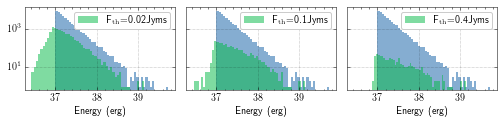

<IPython.core.display.Javascript object>

In [6]:
with plt.style.context(["science", "grid"]):  # , "no-latex"]):
    fig, axes = plt.subplots(
        1,
        3,
        figsize=set_size(width="full", subplots=(1.25, 3)),
        sharey=True,
        sharex=True,
    )
    for i, th in enumerate(thresholds):
        ax = axes[i]
        print(th)
        detected, detected_in_band_df, Es = run_search(
            bursts_steep,
            fstart=974,
            fend=1774,
            fluence_threshold=th,
            in_band_sig=3,
            ret="all",
            distance=972,
        )
        print(len(bursts_steep), len(detected))

        analyse_and_plot(bursts_steep, detected, Es, ax, th)
        ax.set_xlabel("Energy (erg)")
    plt.tight_layout()
#     plt.savefig("energy_pdf_flat.pdf", bbox_inches="tight", dpi=300)

0.02
44294 13843
Injected mu_f is: 1649.511+248.83-248.89
Recovered mu_f is: 1587.297+198.39-217.13
Injected sig_f is: 335.03+232.98-198.95
Recovered sig_f is: 160.80+166.73-100.60
0.1
44294 3921
Injected mu_f is: 1649.511+248.83-248.89
Recovered mu_f is: 1561.861+168.49-197.50
Injected sig_f is: 335.03+232.98-198.95
Recovered sig_f is: 70.54+168.60-50.08
0.4
44294 1141
Injected mu_f is: 1649.511+248.83-248.89
Recovered mu_f is: 1557.288+154.90-211.71
Injected sig_f is: 335.03+232.98-198.95
Recovered sig_f is: 29.04+138.54-22.96


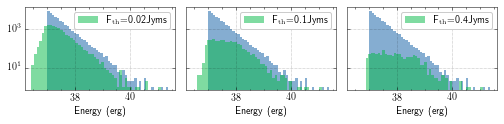

<IPython.core.display.Javascript object>

In [7]:
with plt.style.context(["science", "grid"]):  # , "no-latex"]):
    fig, axes = plt.subplots(
        1,
        3,
        figsize=set_size(width="full", subplots=(1.25, 3)),
        sharey=True,
        sharex=True,
    )
    for i, th in enumerate(thresholds):
        ax = axes[i]
        print(th)
        detected, detected_in_band_df, Es = run_search(
            bursts_flat,
            fstart=974,
            fend=1774,
            fluence_threshold=th,
            in_band_sig=3,
            ret="all",
            distance=972,
        )
        print(len(bursts_flat), len(detected))

        analyse_and_plot(bursts_flat, detected, Es, ax, th)
        ax.set_xlabel("Energy (erg)")
    plt.tight_layout()
#     plt.savefig("energy_pdf_flat.pdf", bbox_inches="tight", dpi=300)